In [1]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

In [2]:
results = pl.read_parquet("test-data-linear-svc-results.parquet")

In [3]:
results = results.with_columns(
    pl.col("Features").map_elements(lambda x: len(x)).alias("Feature_Count")
)

# Filter rows where the length is equal to 1
single_features_df = results.filter(pl.col("Feature_Count") == 1)
single_features_df

Features,NumFeatures,TrainTime,PredictTime,Accuracy,ConfusionMatrix_Shape,ConfusionMatrix,ClassificationReport,ModelPath,Feature_Count
list[str],i64,f64,f64,f64,list[i64],list[i64],str,str,i64
"[""hue""]",180,0.395514,2.19618,0.15004,"[43, 43]","[1, 16, … 25]",""" …","""models\linear-…",1
"[""sat""]",256,0.398213,3.793477,0.084481,"[43, 43]","[24, 11, … 7]",""" …","""models\linear-…",1
"[""value""]",256,0.414563,4.395478,0.050435,"[43, 43]","[7, 2, … 4]",""" …","""models\linear-…",1
"[""hog""]",2916,2.624363,13.393219,0.925653,"[43, 43]","[58, 0, … 66]",""" …","""models\linear-…",1
"[""lbp""]",4096,3.837921,49.372179,0.809184,"[43, 43]","[53, 0, … 58]",""" …","""models\linear-…",1
"[""template""]",3483,3.113605,10.398506,0.801663,"[43, 43]","[45, 8, … 68]",""" …","""models\linear-…",1
"[""vgg16""]",512,0.662278,9.252014,0.192003,"[43, 43]","[2, 0, … 21]",""" …","""models\linear-…",1
"[""resnet101""]",2048,1.95767,15.556498,0.601108,"[43, 43]","[40, 6, … 53]",""" …","""models\linear-…",1


<Figure size 600x600 with 0 Axes>

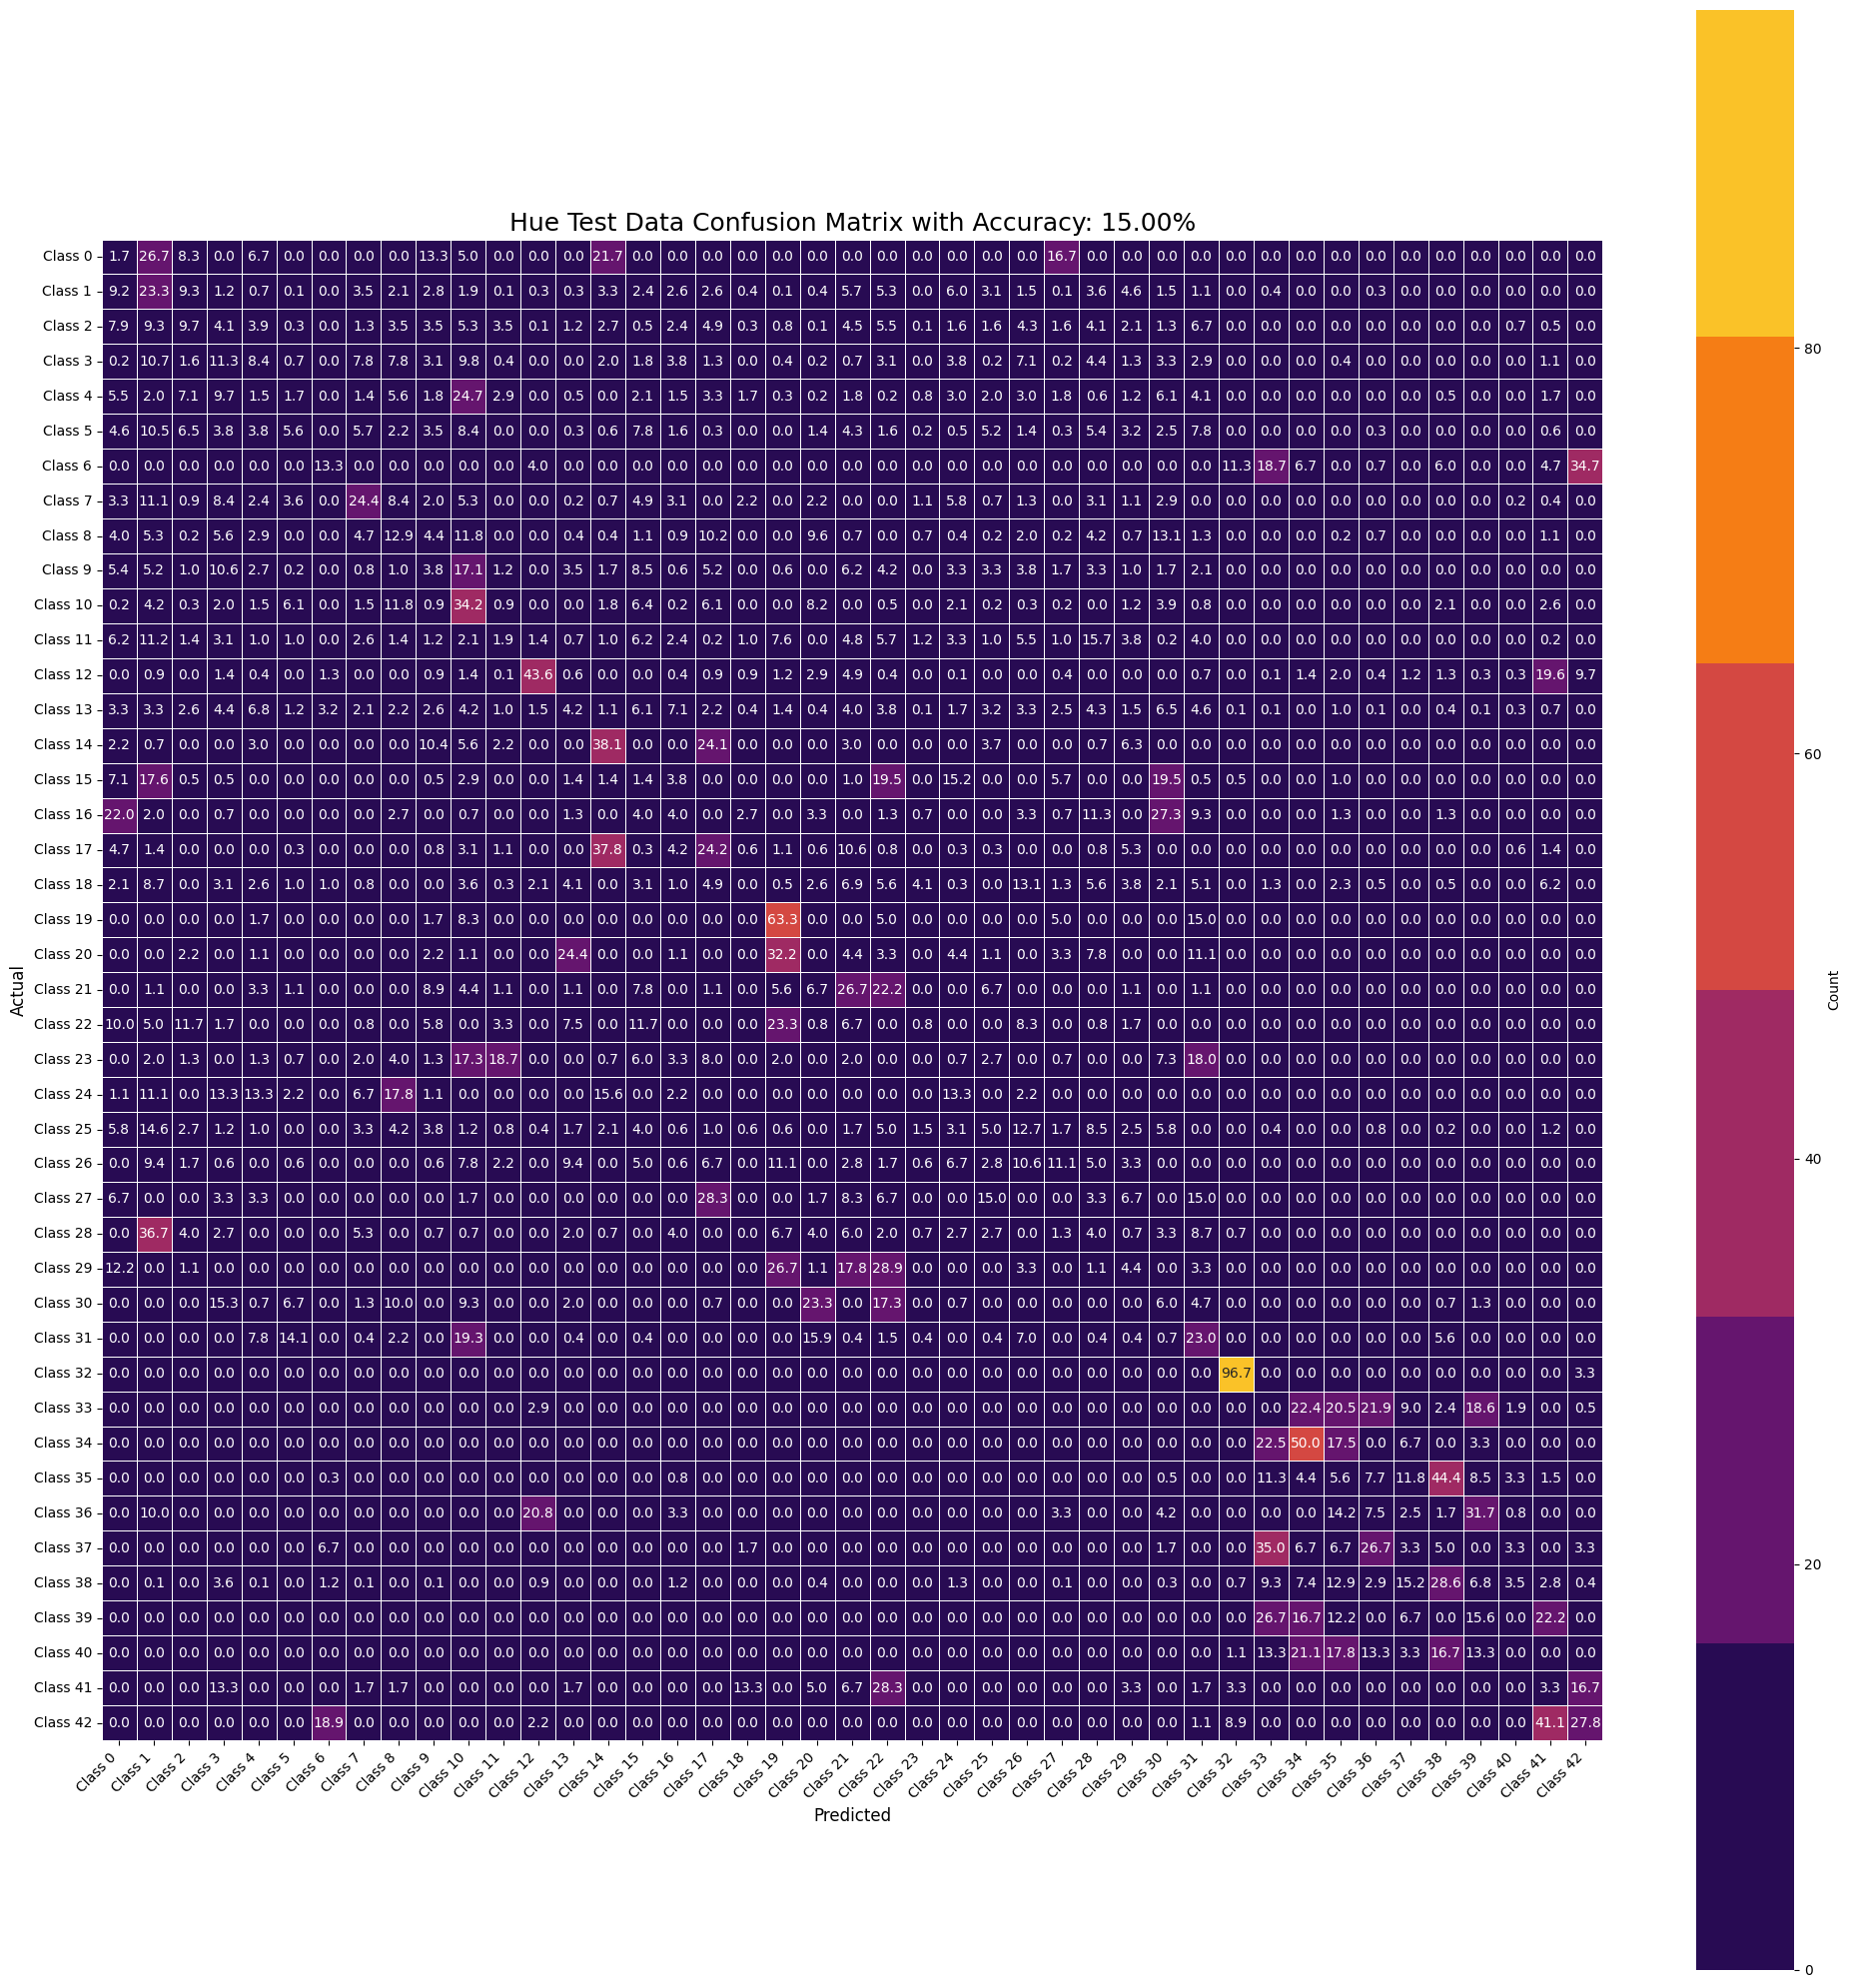

<Figure size 600x600 with 0 Axes>

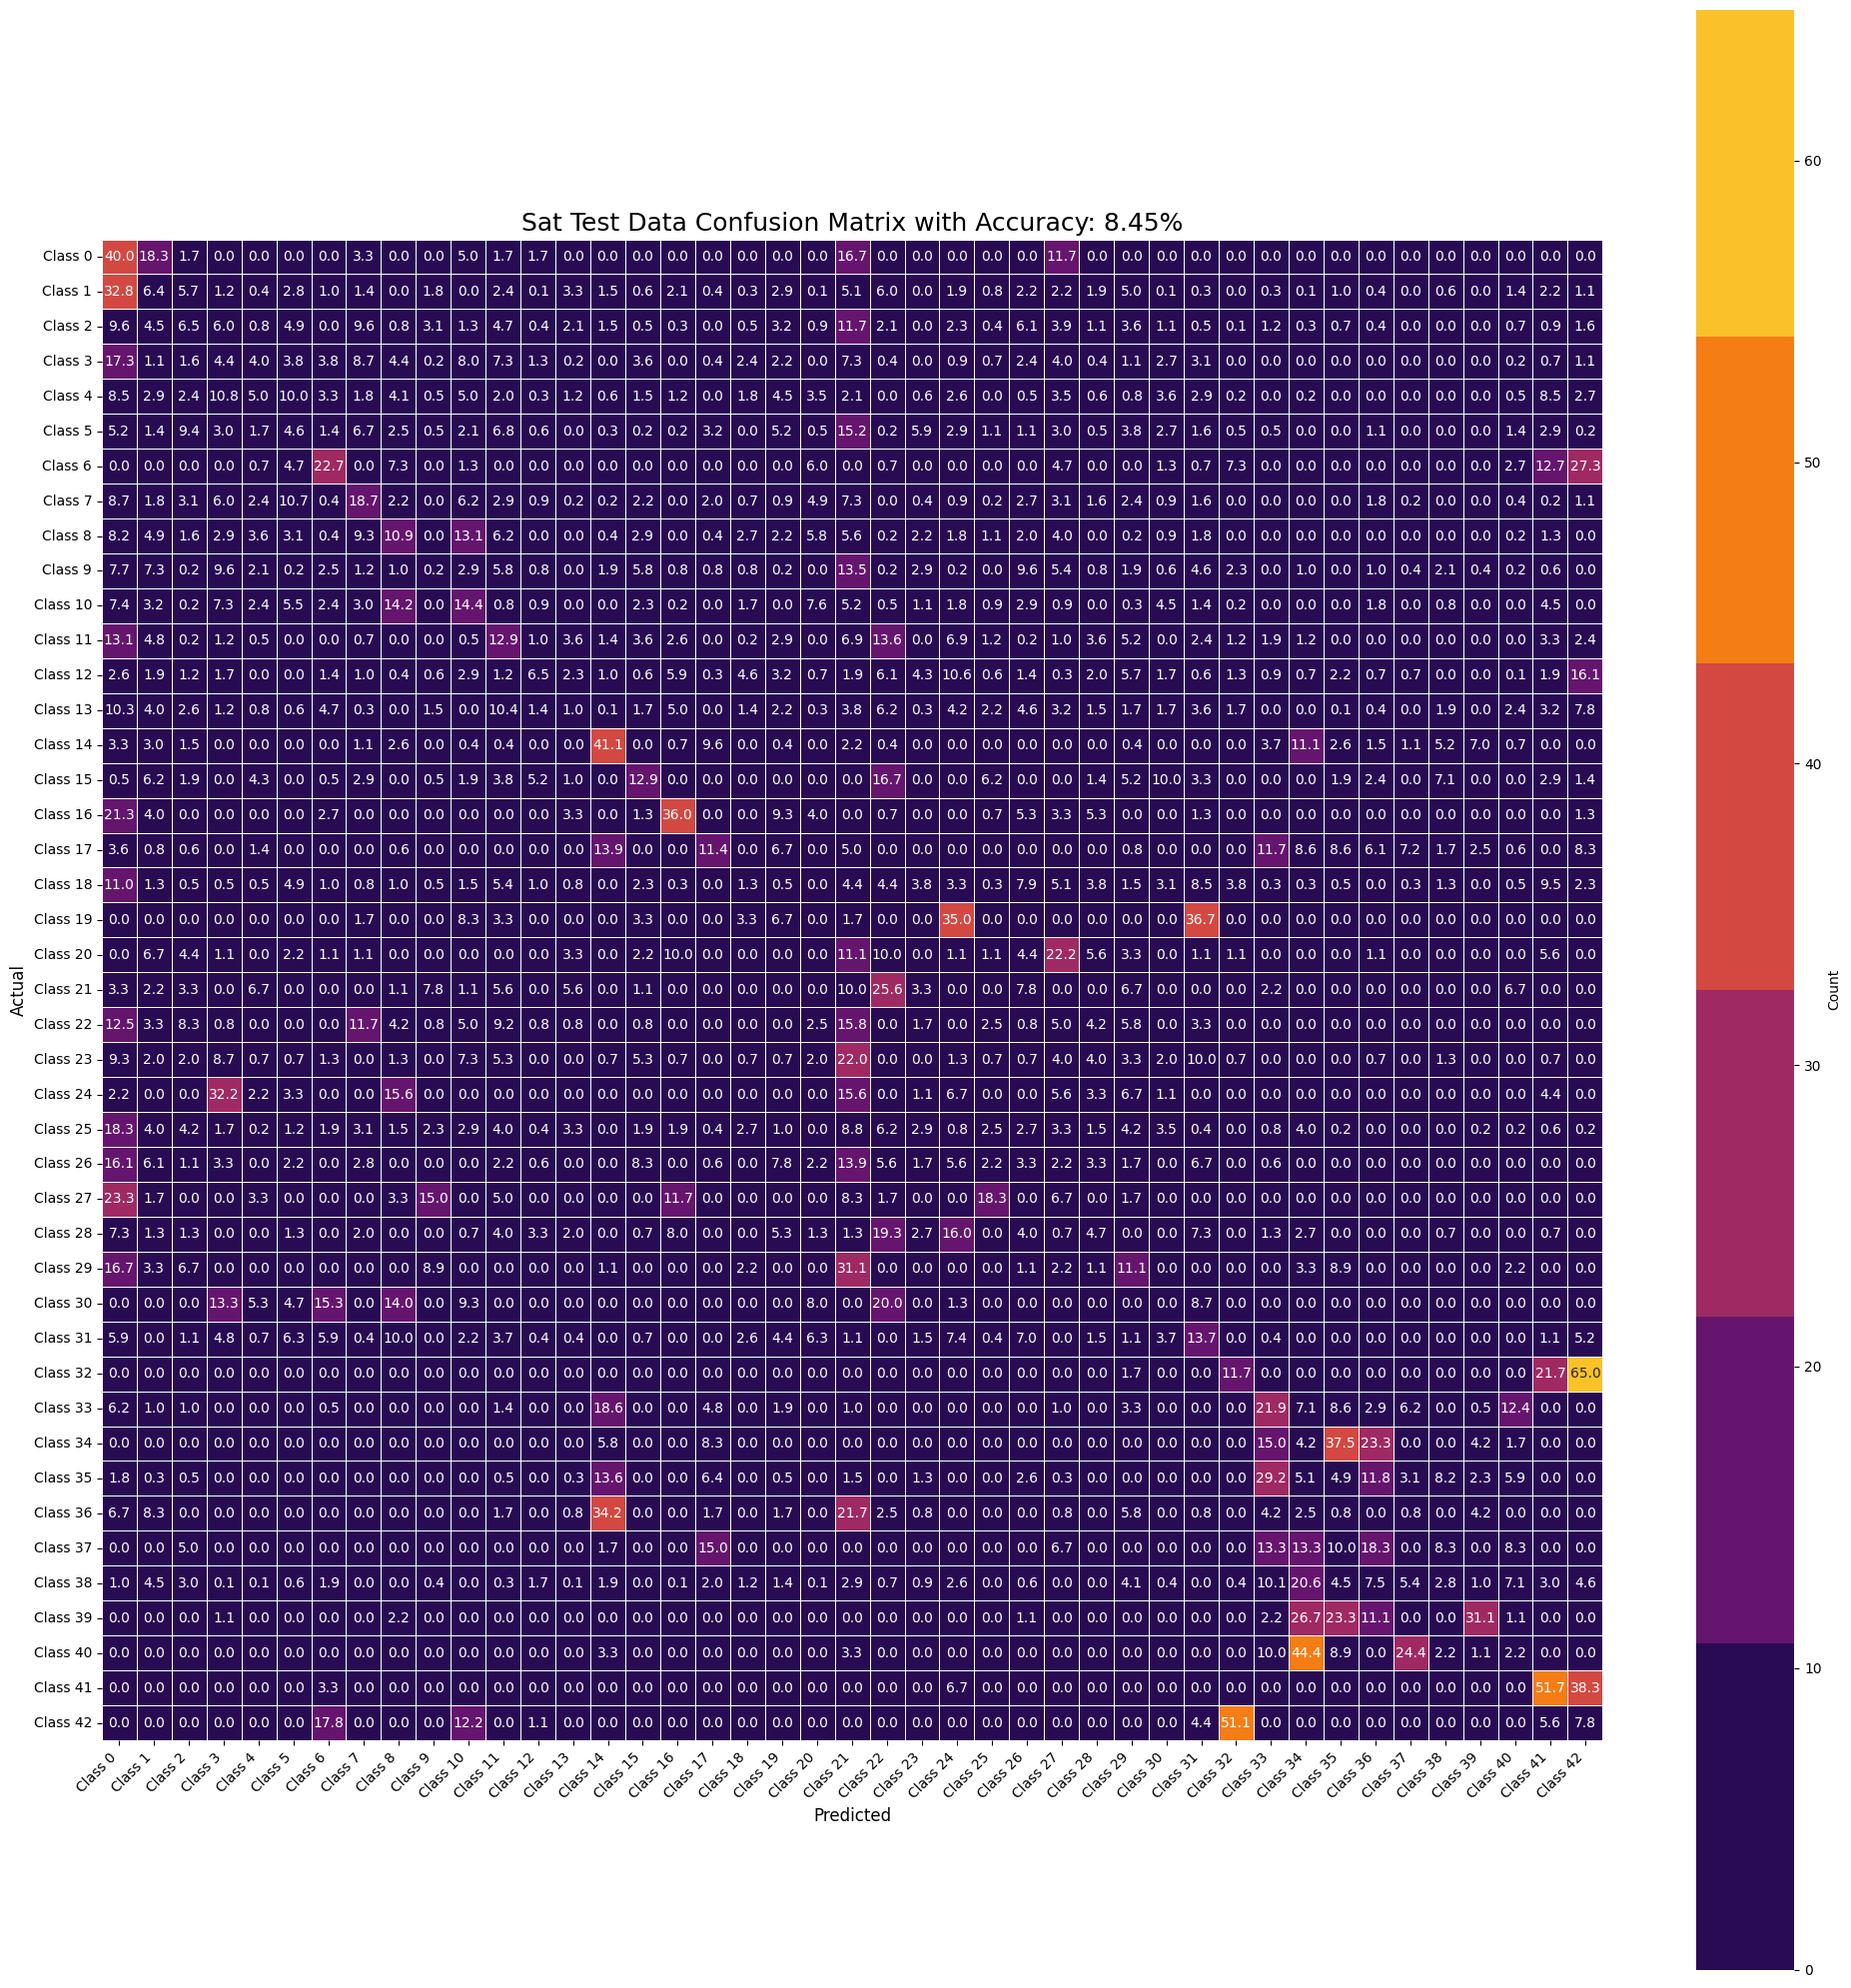

<Figure size 600x600 with 0 Axes>

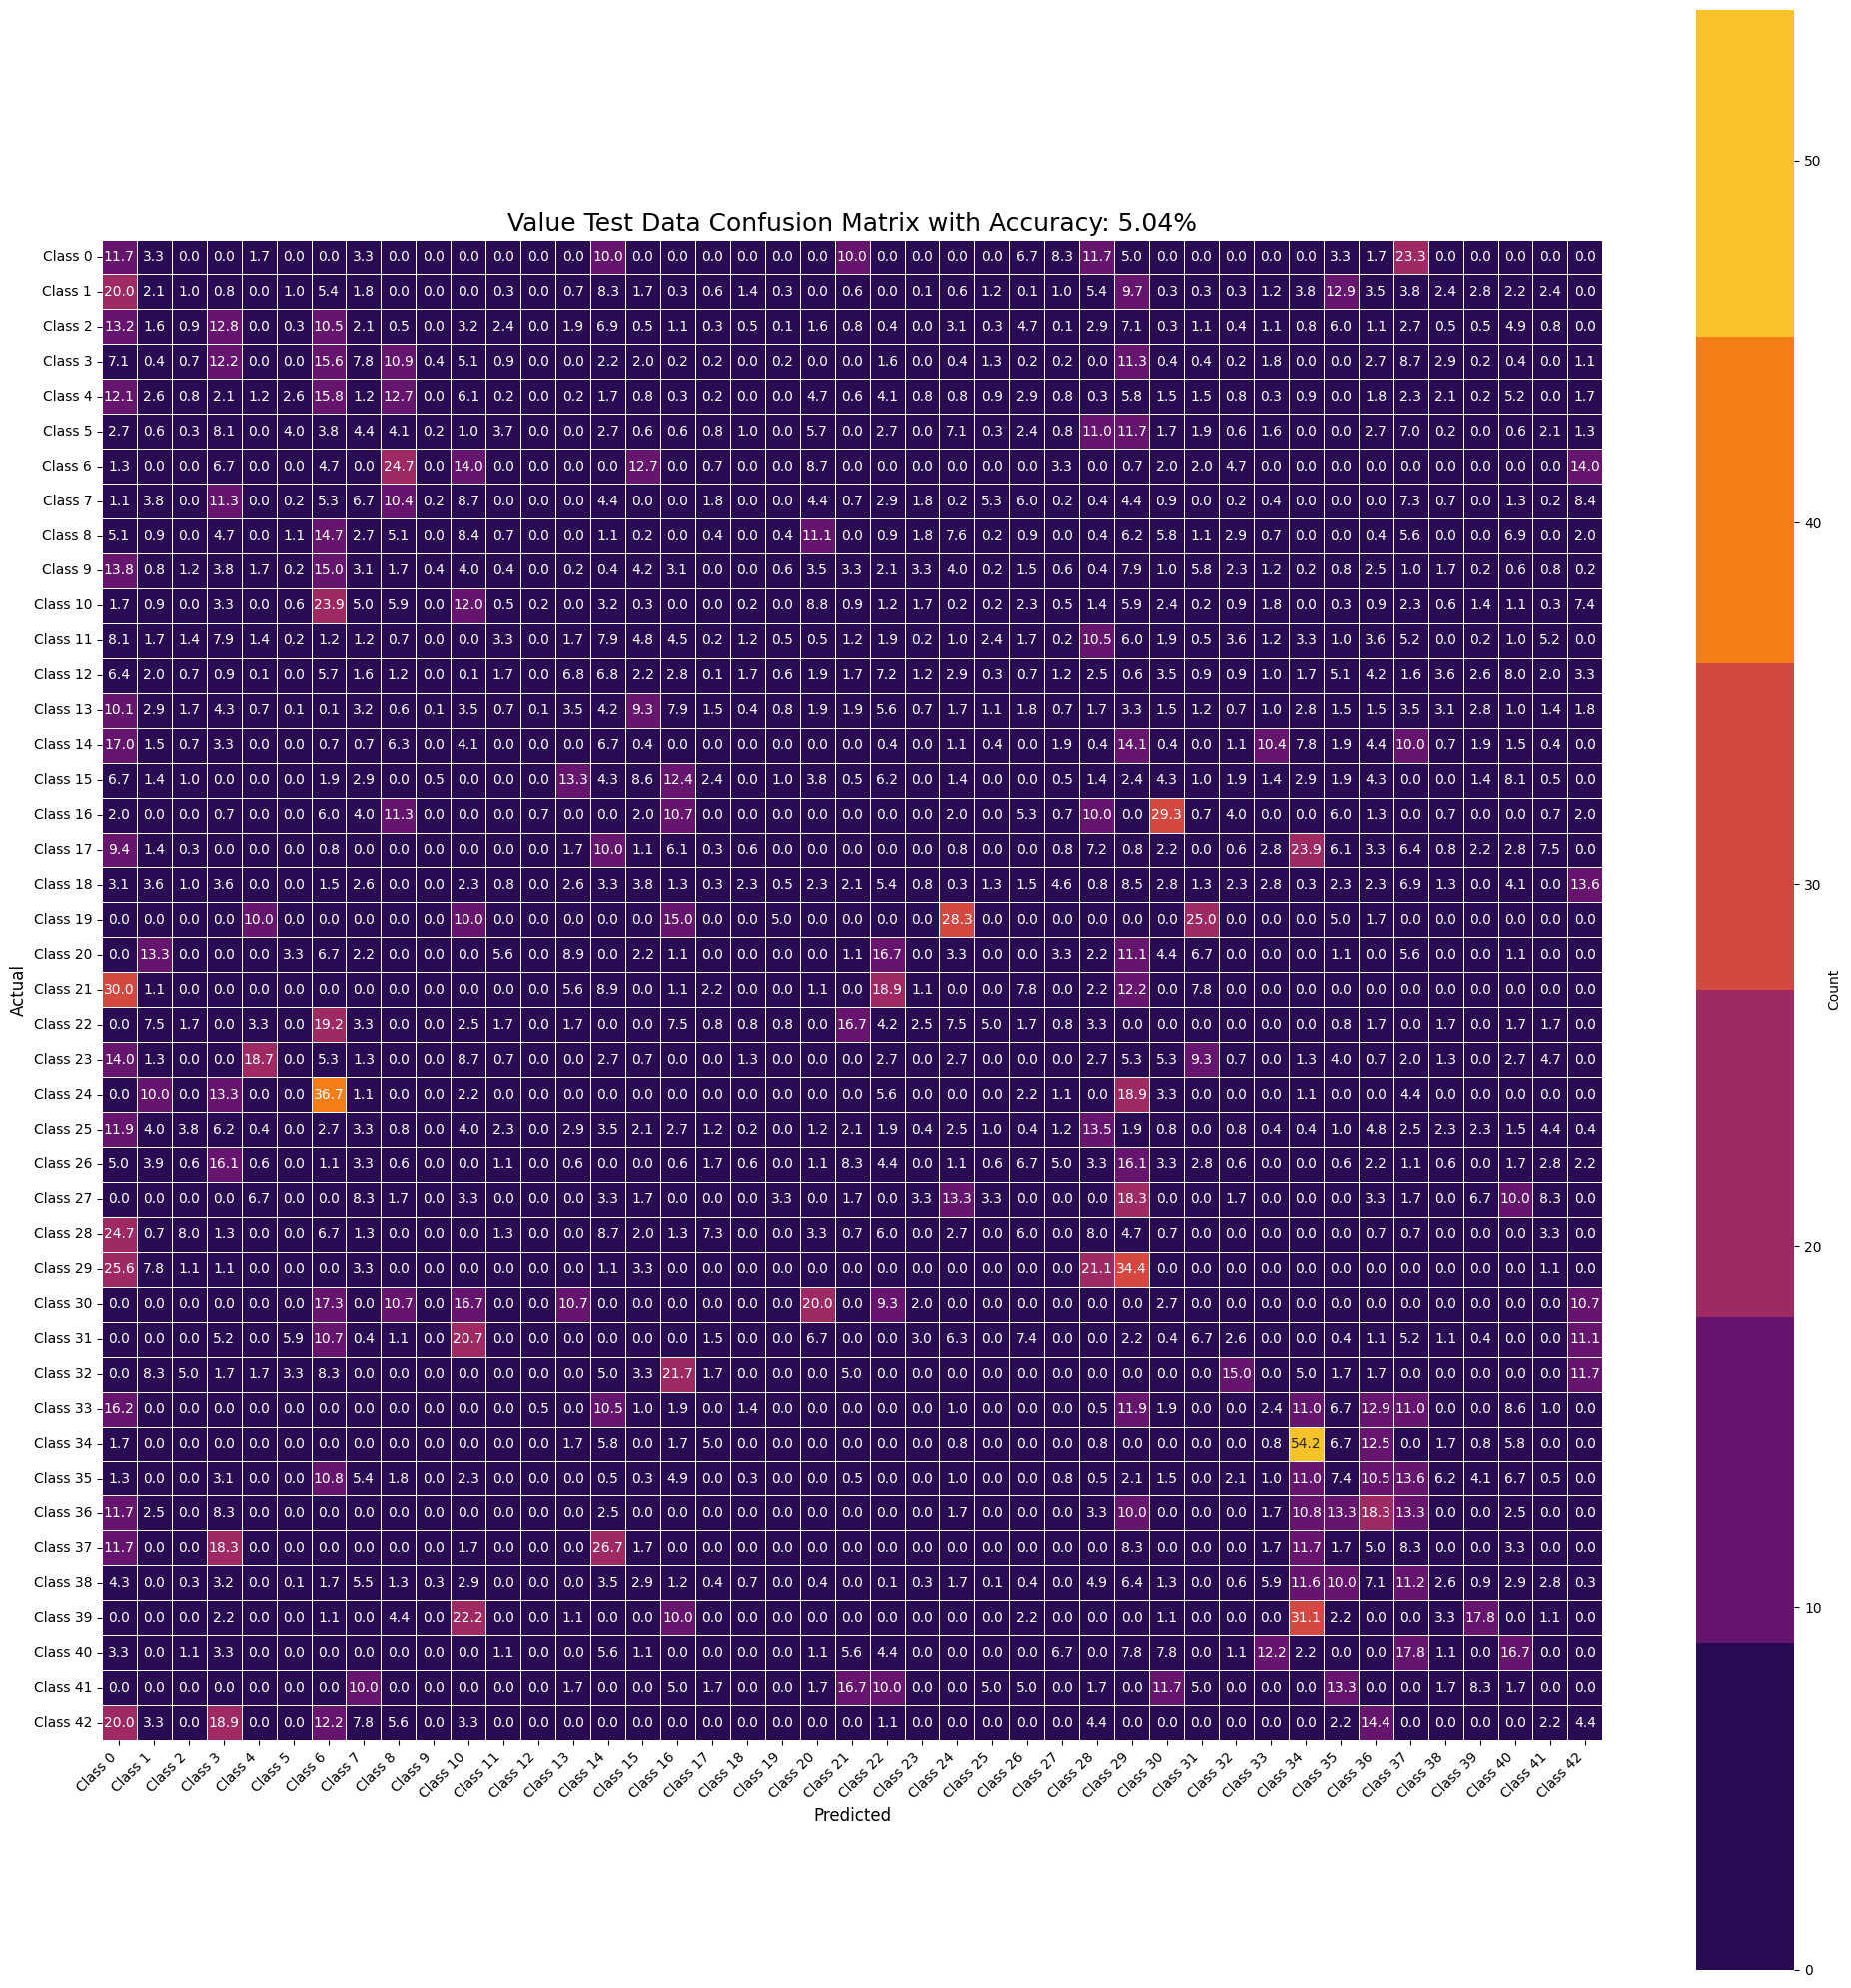

<Figure size 600x600 with 0 Axes>

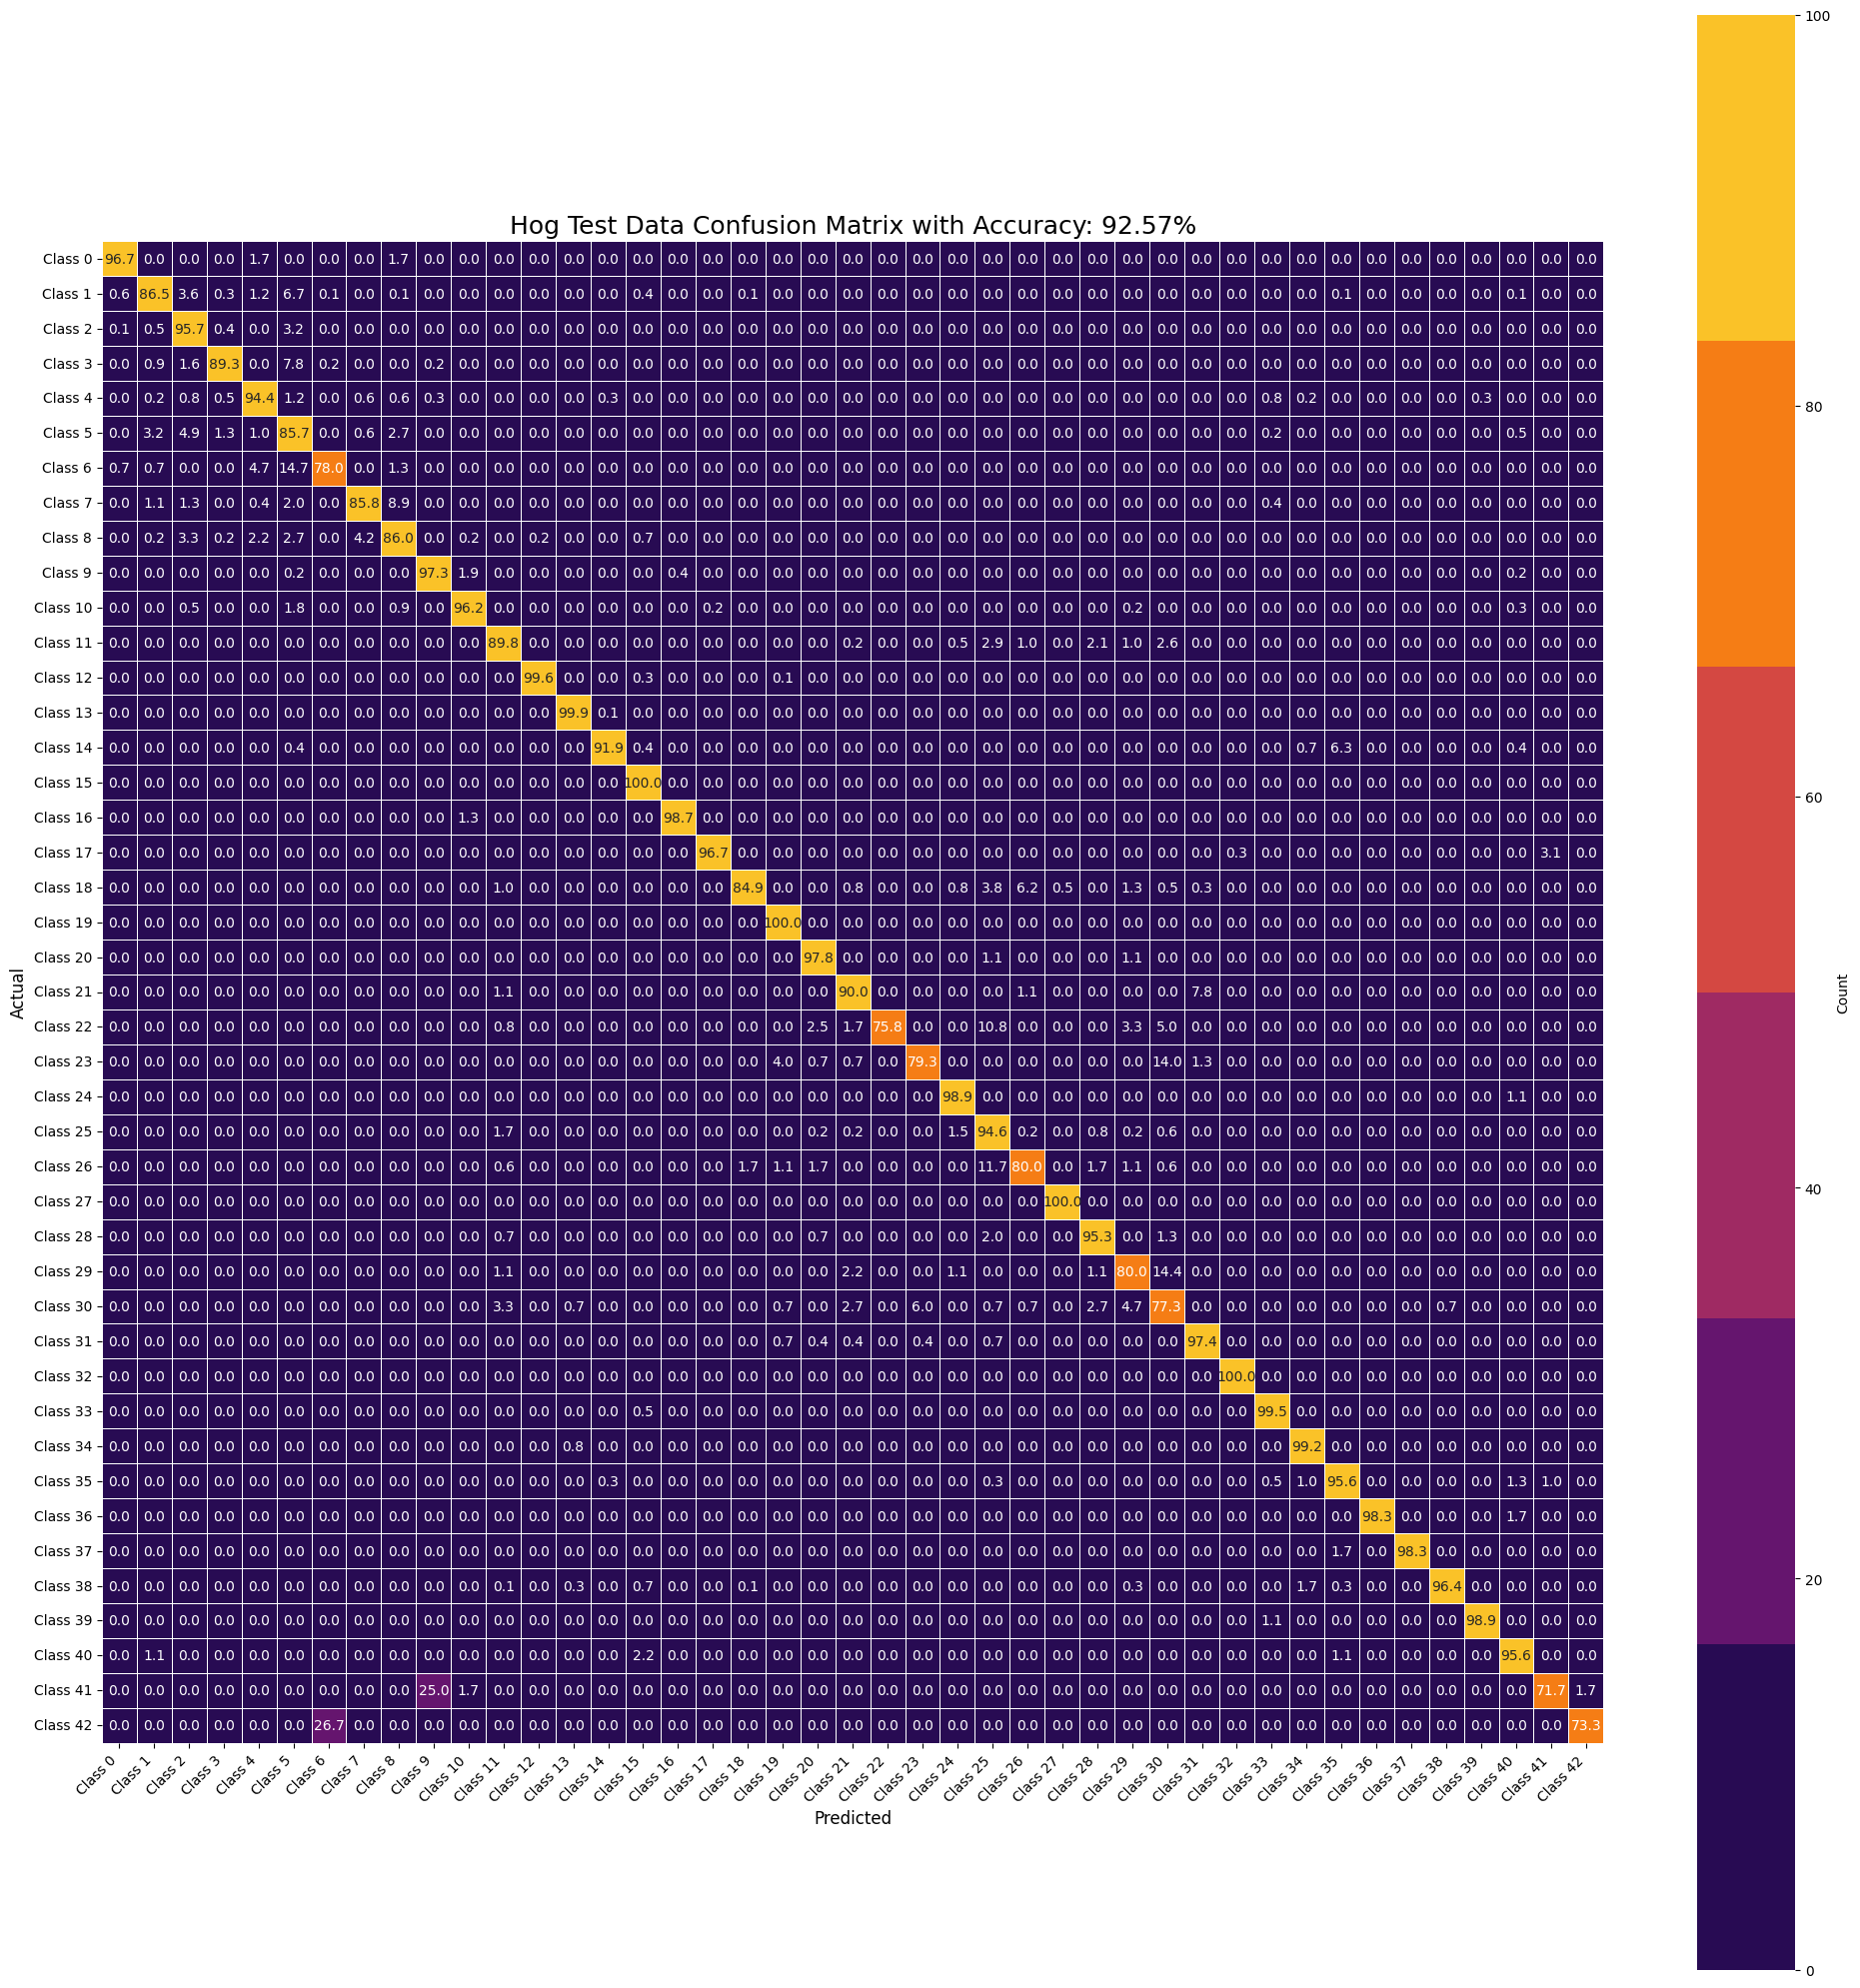

<Figure size 600x600 with 0 Axes>

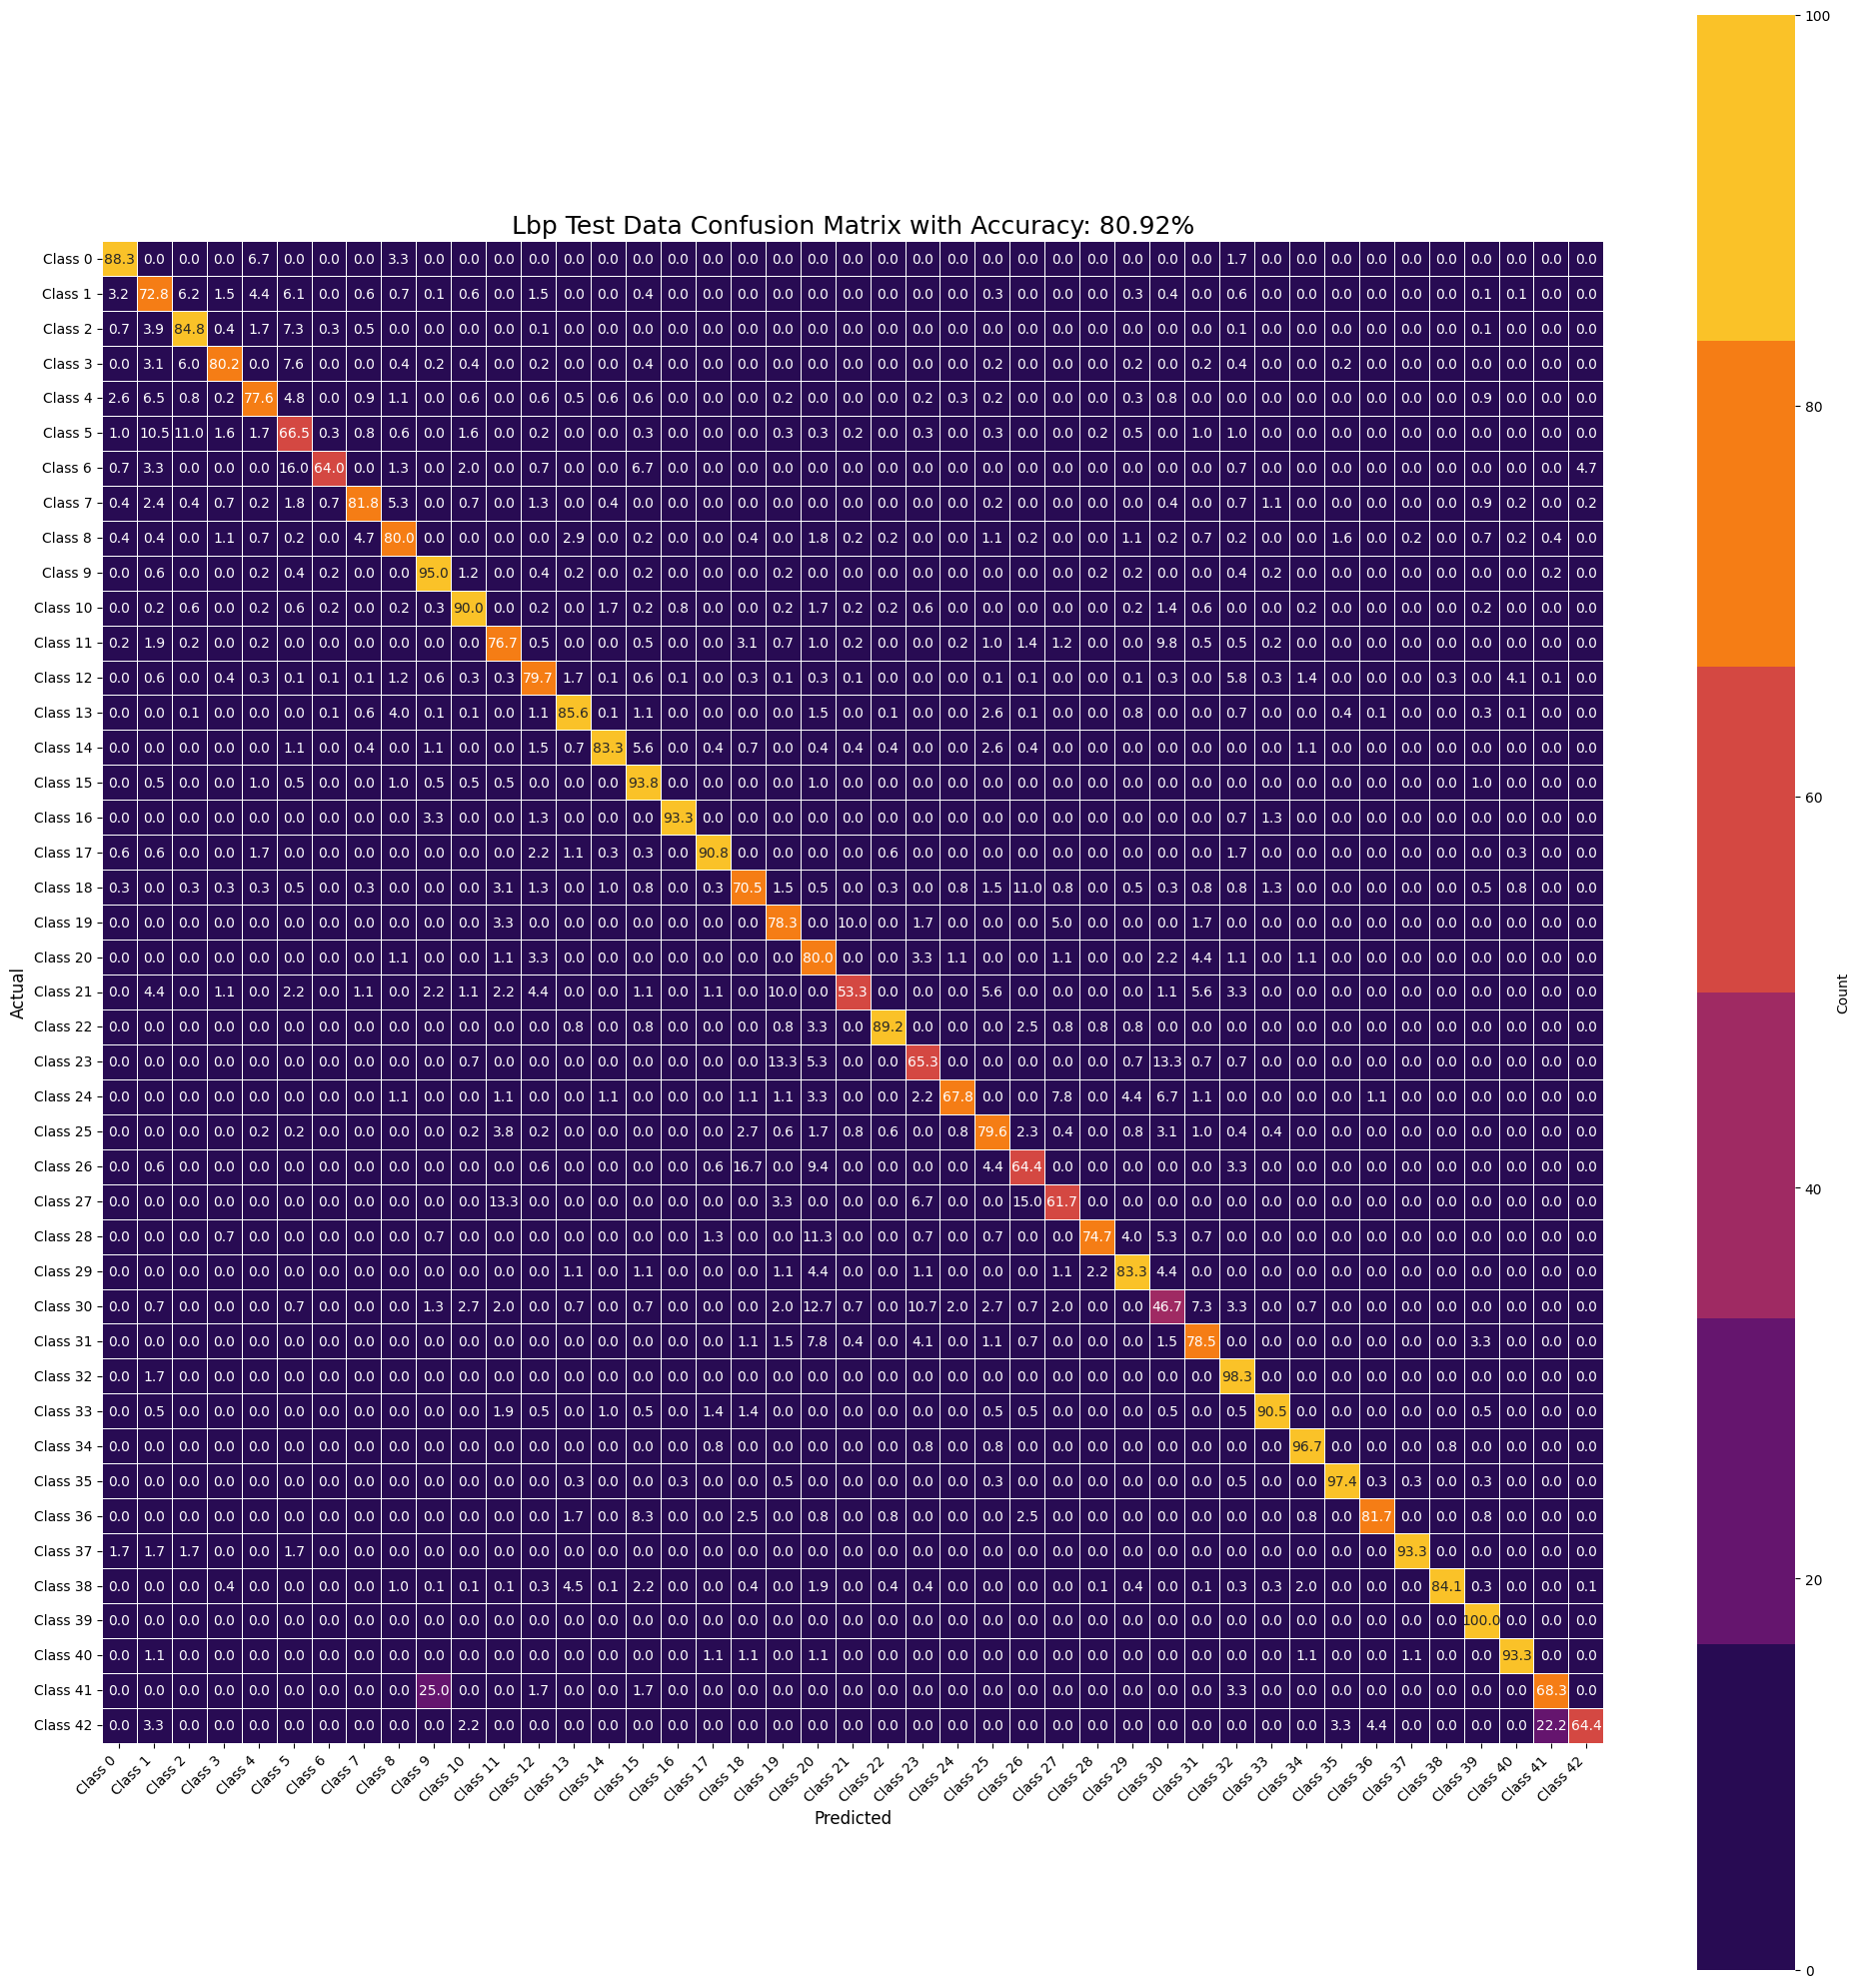

<Figure size 600x600 with 0 Axes>

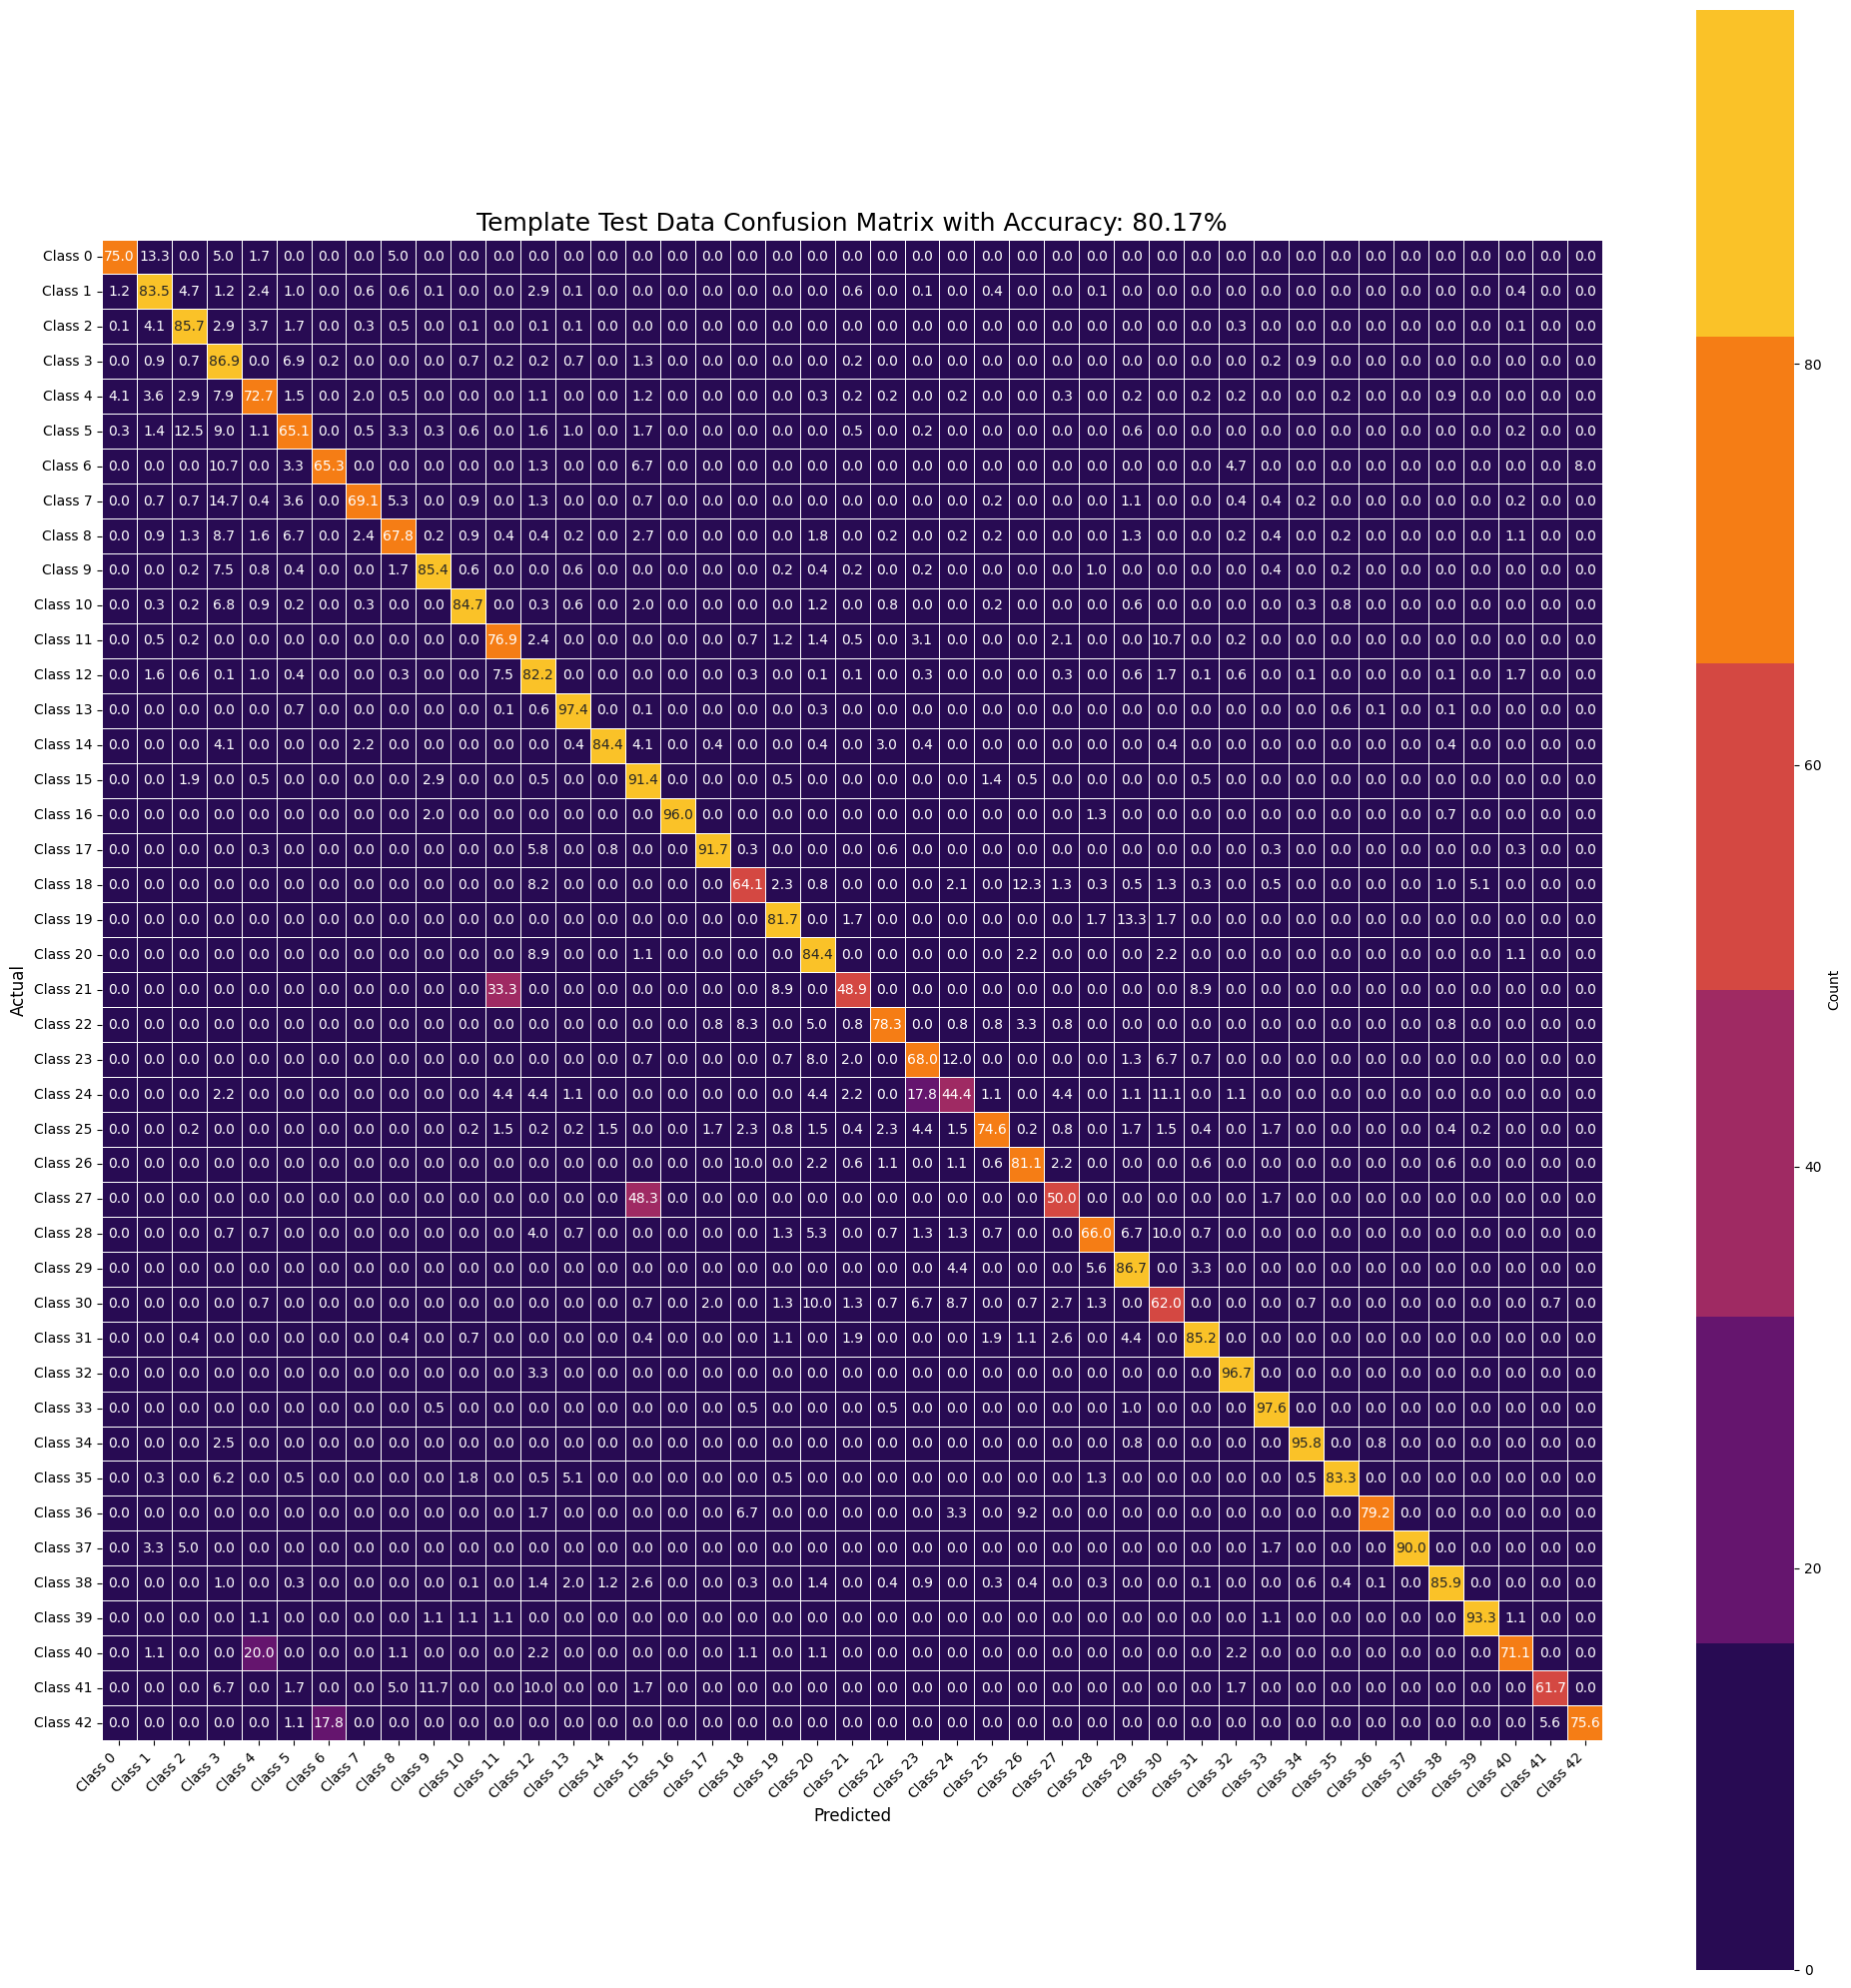

<Figure size 600x600 with 0 Axes>

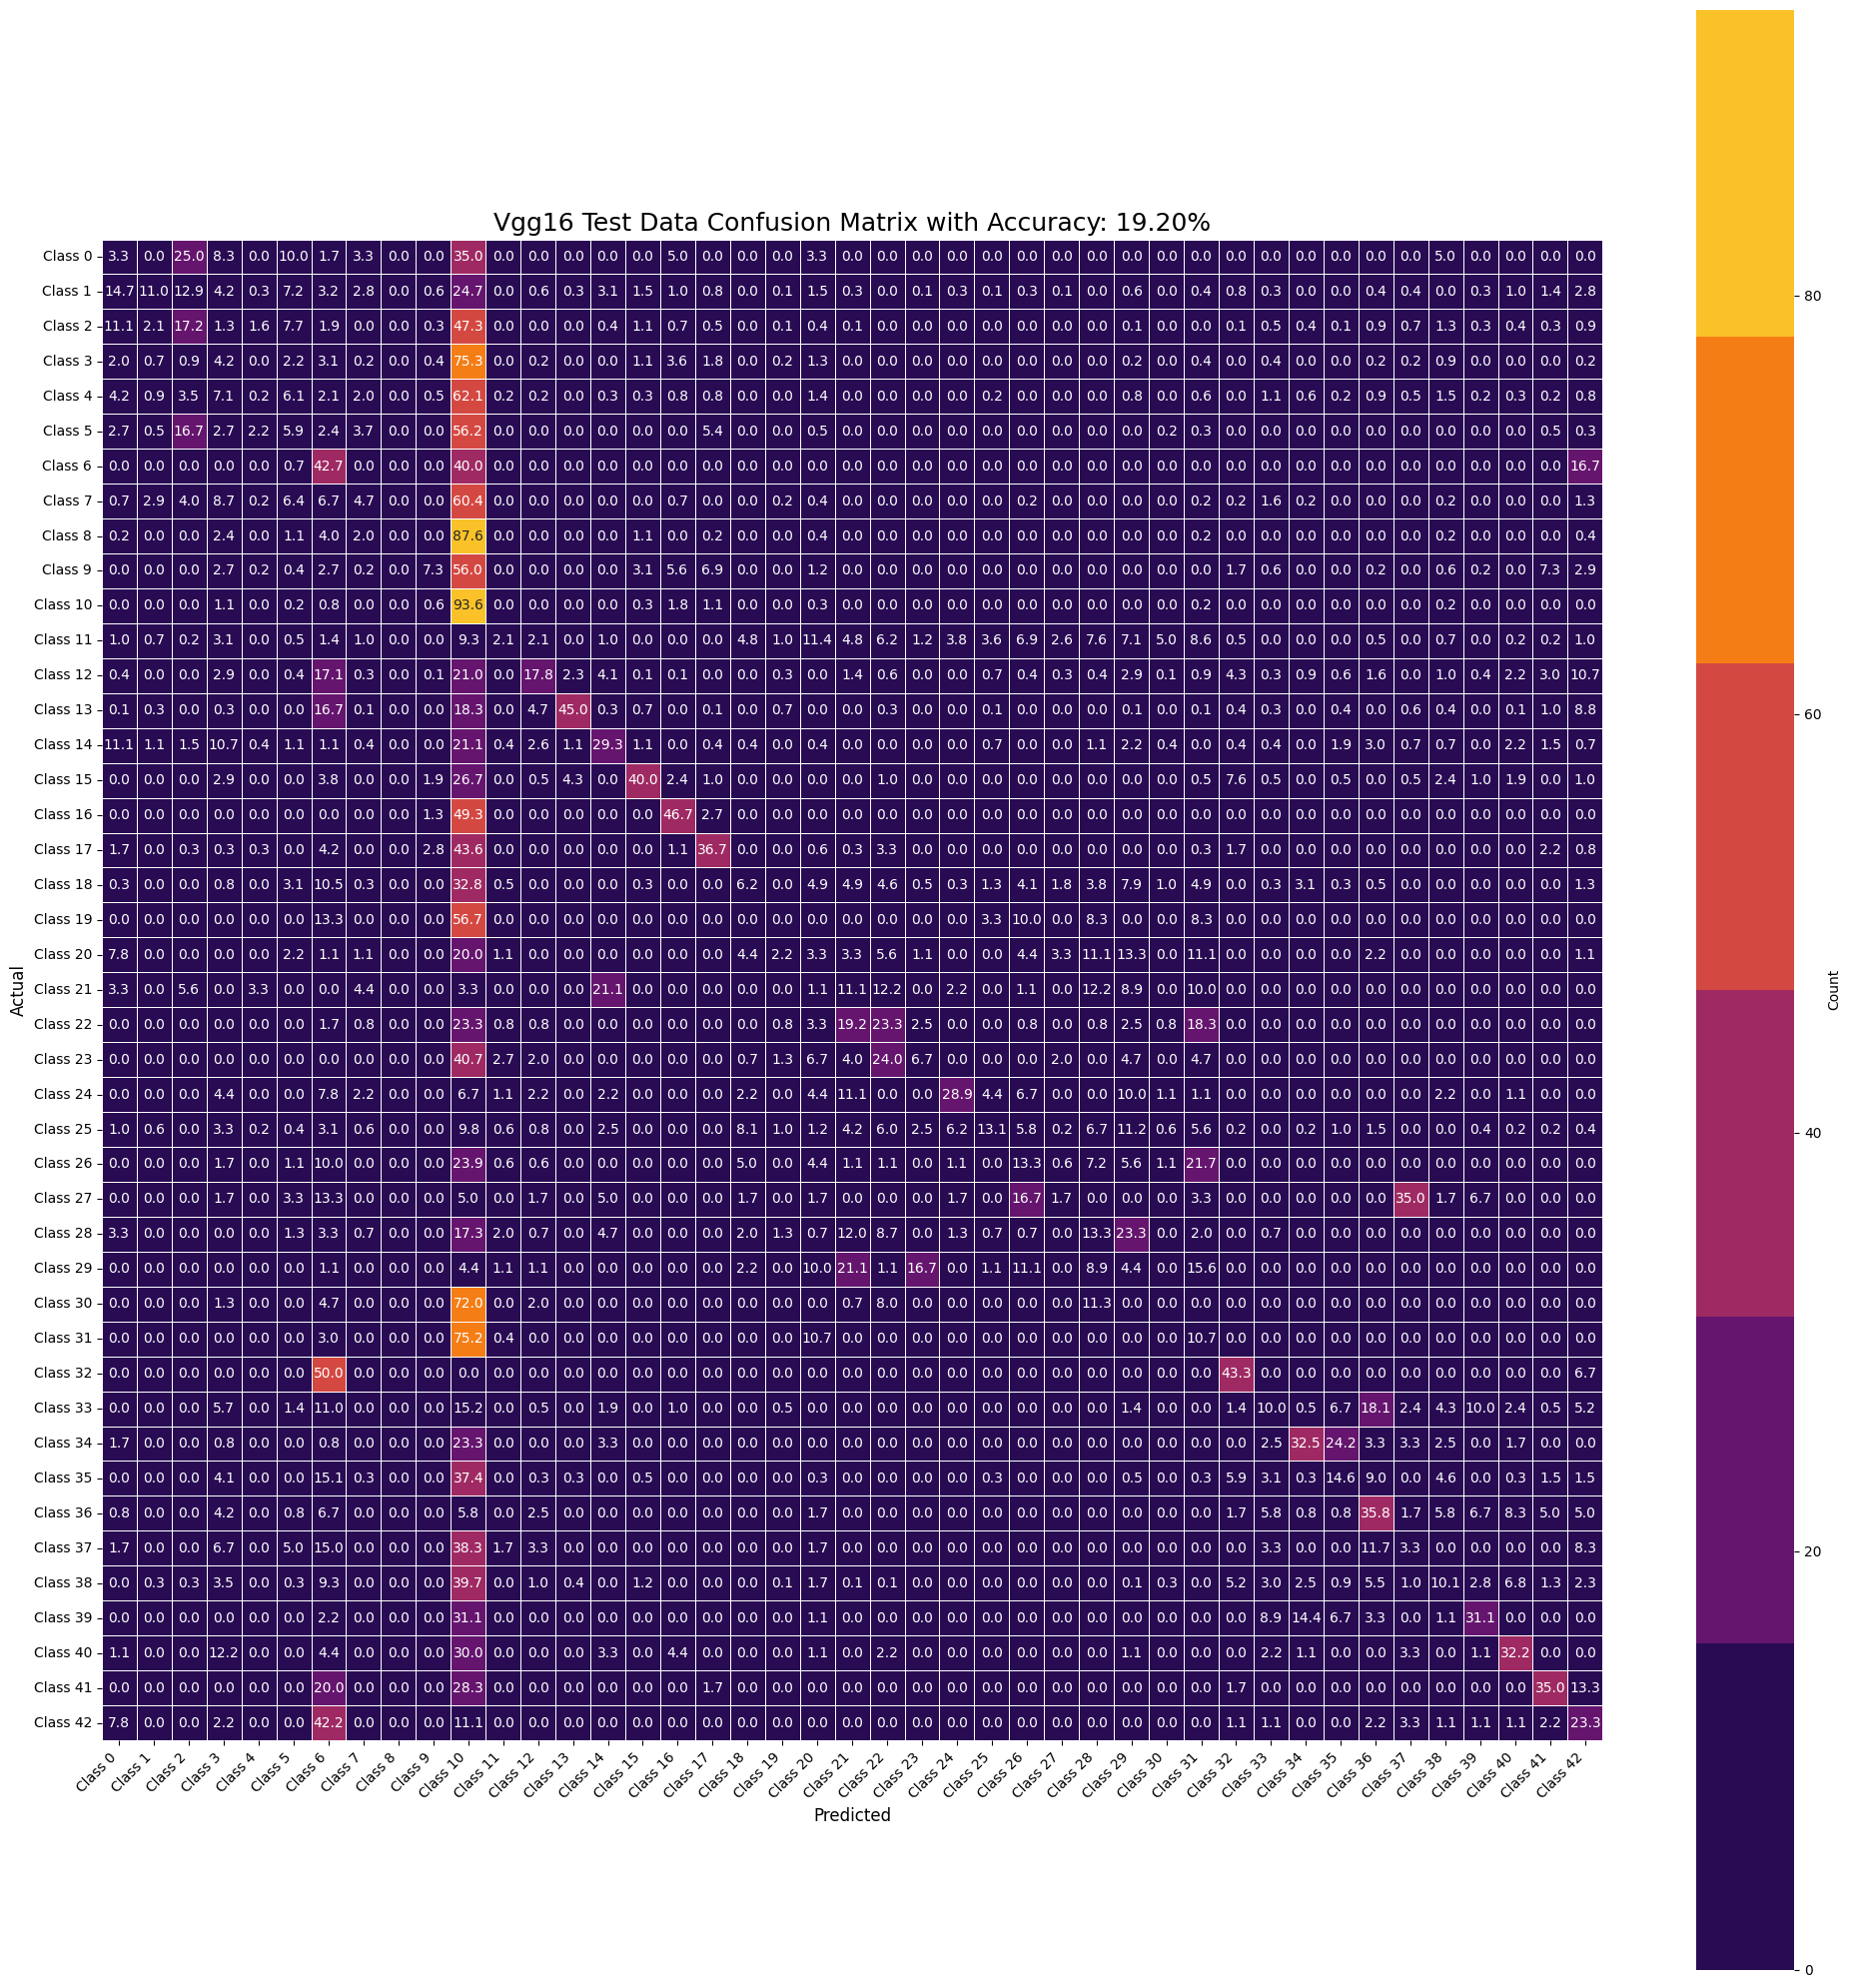

<Figure size 600x600 with 0 Axes>

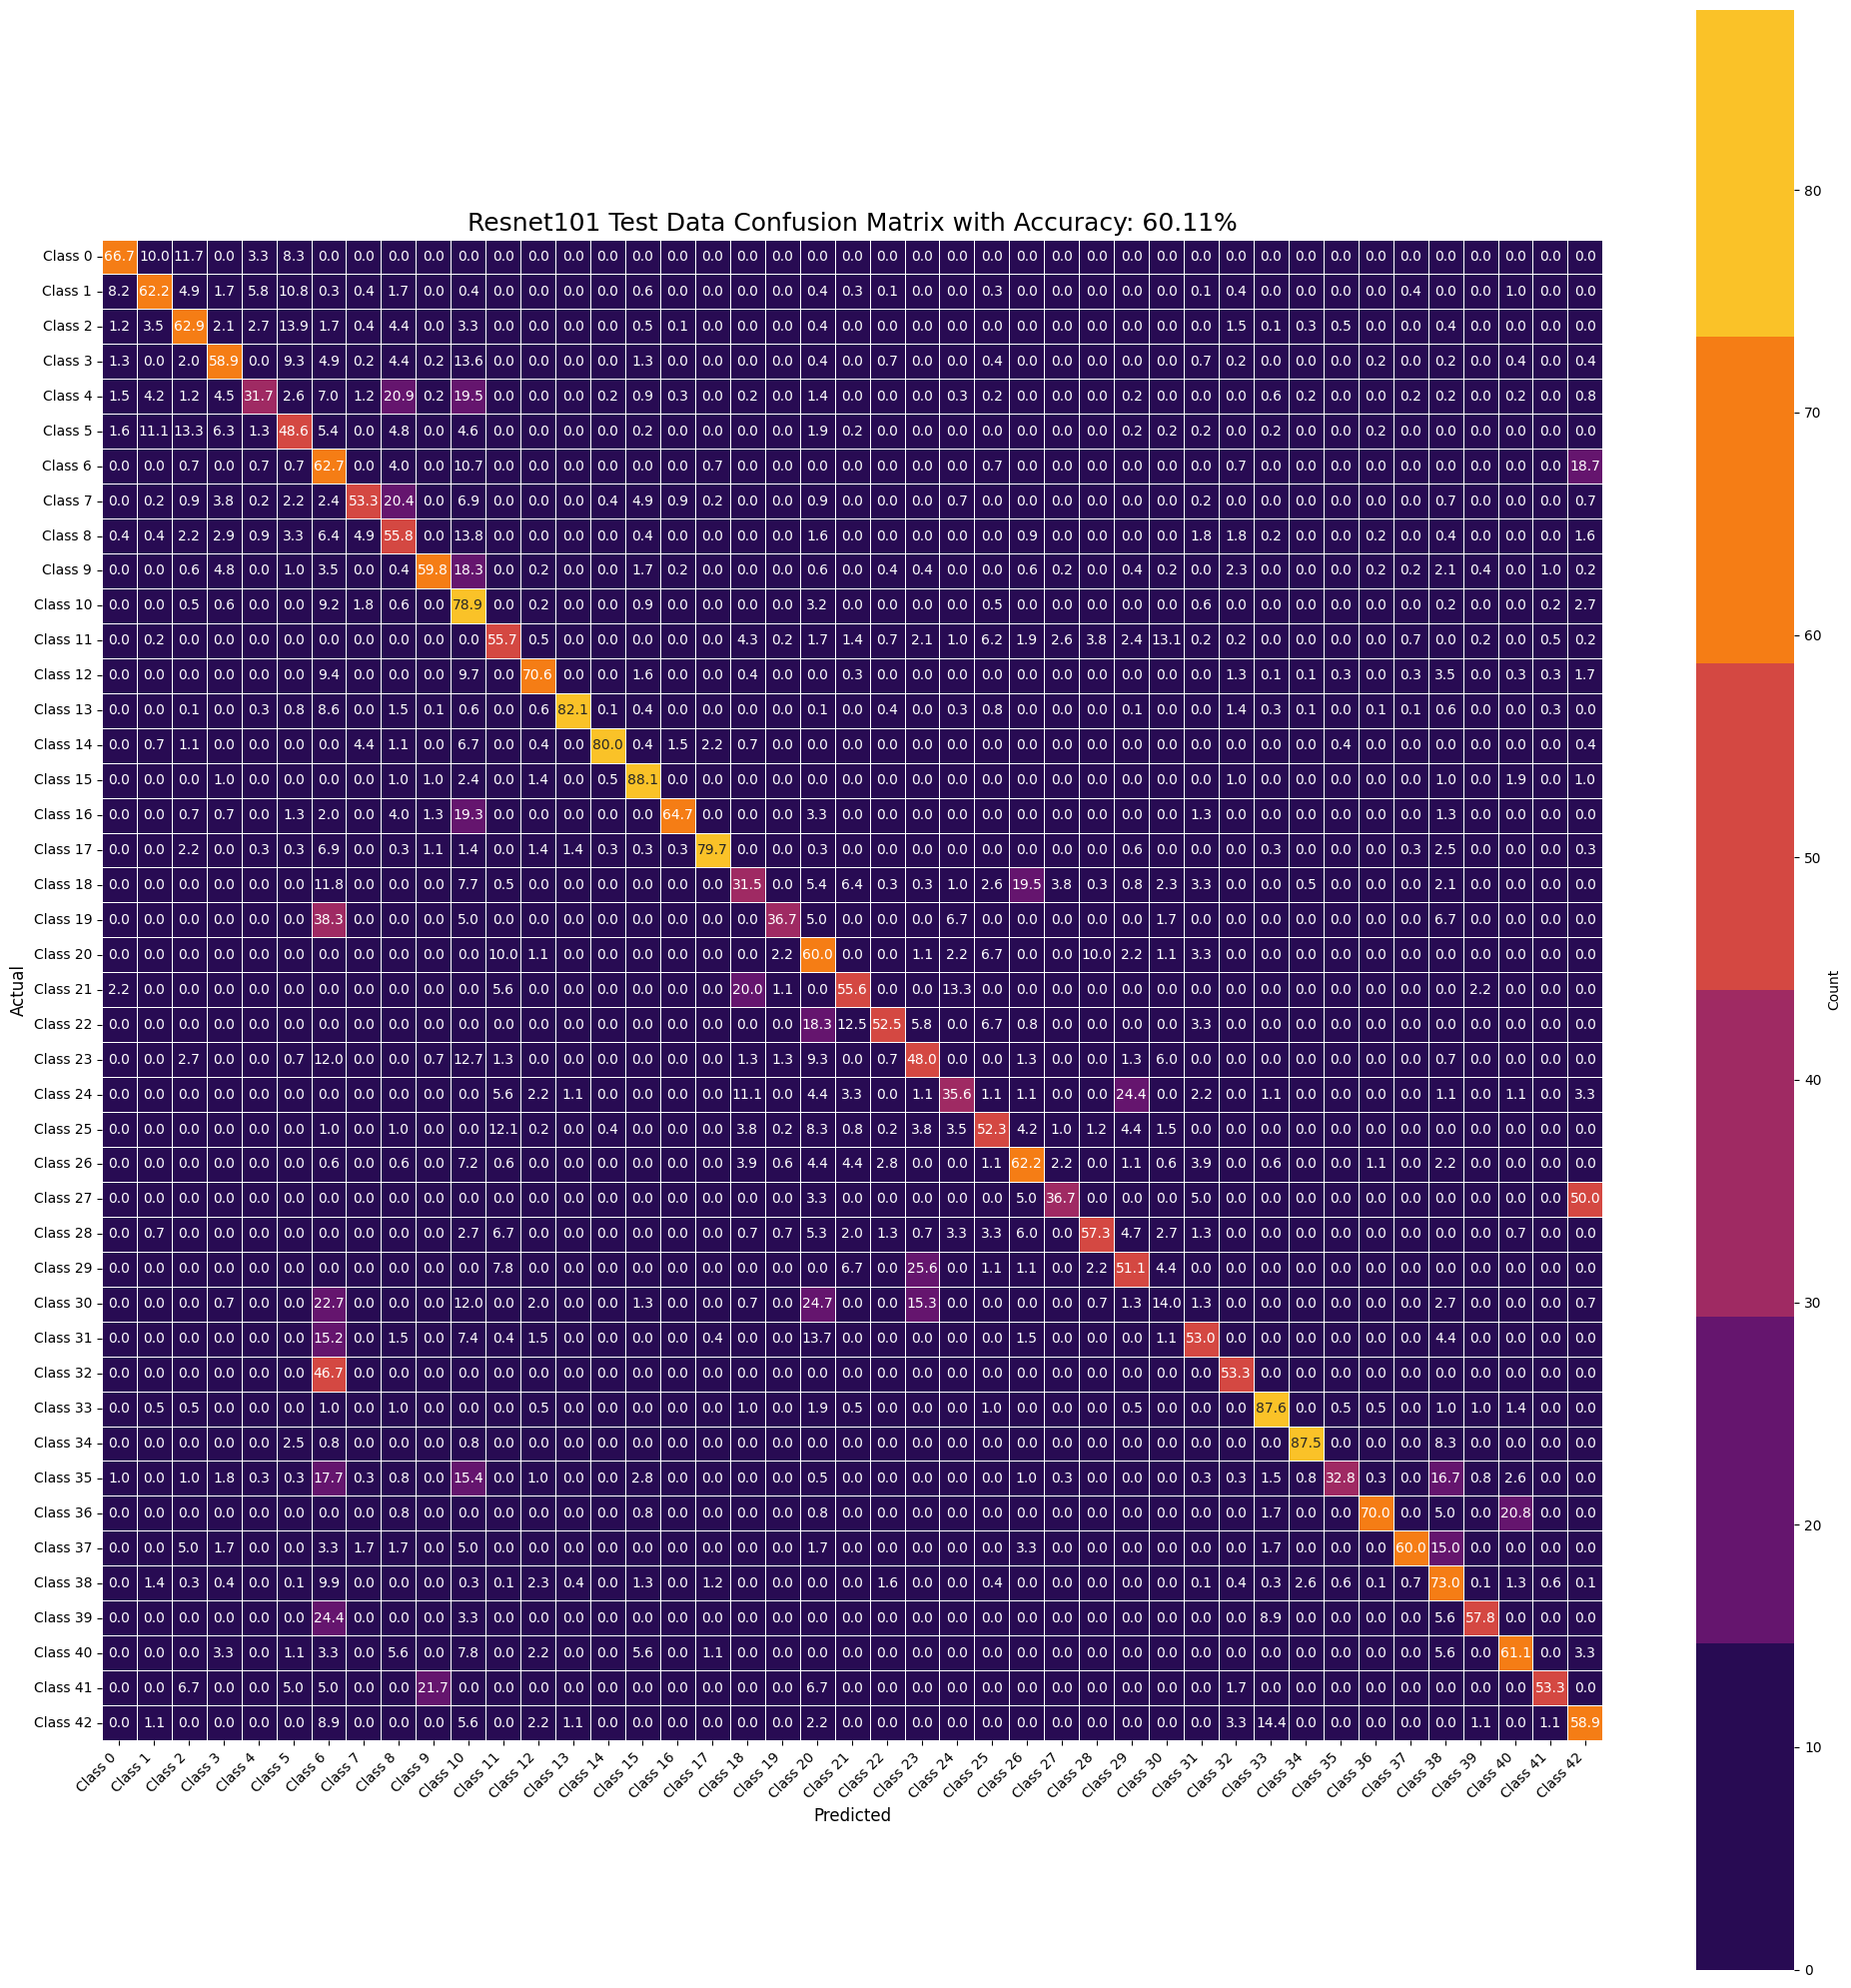

In [4]:
for row in single_features_df.iter_rows(named=True):
    cm = np.asarray(row["ConfusionMatrix"]).reshape(row["ConfusionMatrix_Shape"])
    cm_percent = (
    cm.astype("float")
    / cm.sum(axis=1)[:, np.newaxis]
    * 100
    )
    plt.figure(figsize=(6, 6))

    class_labels = [f"Class {i}" for i in range(43)]

    # Create a color map to represent the count values
    color_map = ListedColormap(sns.color_palette("inferno"))
    plt.figure(figsize=(20, 20))
    sns.heatmap(
        cm_percent,
        annot=True,
        fmt=".1f",
        cmap=color_map,
        linewidths=0.5,
        square=True,
        cbar_kws={"label": "Count"},
        xticklabels=class_labels,
        yticklabels=class_labels,
        annot_kws={"size": 10},
    )
    # Customize labels and title
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.title(
        f"{row['Features'][0].capitalize()} Test Data Confusion Matrix with Accuracy: {row['Accuracy']*100:.2f}%",
        ha="center",
        fontsize=18,
    )

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(rotation=0, fontsize=10)

    # Adjust layout to prevent cutoff of labels
    plt.tight_layout()

    # Show the plot
    plt.show()